In [1]:
import cv2 as cv
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Z = "C8F20P416_image1"
ZZ = f"C:\\Users\\Dino\\Desktop\\jupyter scripts for second try\\images for human\\{Z}.jpeg"

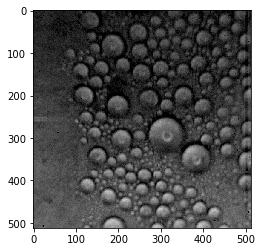

In [3]:
im_in_actual = cv.imread(ZZ)
plt.imshow(im_in_actual)
plt.show()

In [4]:
def unsharp_mask(image, kernel_size=(9, 9), sigma=2.0, amount=2.0, threshold=0):
    blurred = cv.GaussianBlur(image, kernel_size, sigma)
    sharpened = float(amount + 1) * image - float(amount) * blurred
    sharpened = np.maximum(sharpened, np.zeros(sharpened.shape))
    sharpened = np.minimum(sharpened, 255 * np.ones(sharpened.shape))
    sharpened = sharpened.round().astype(np.uint8)
    if threshold > 0:
        low_contrast_mask = np.absolute(image - blurred) < threshold
        np.copyto(sharpened, image, where=low_contrast_mask)
    return sharpened

In [5]:
def CC(img):
    nlabels, labels, stats, centroids = cv.connectedComponentsWithStats(img)
    label_hue = np.uint8(179 * labels / np.max(labels))
    blank_ch = 255 * np.ones_like(label_hue)
    labeled_img = cv.merge([label_hue, blank_ch, blank_ch])
    labeled_img = cv.cvtColor(labeled_img, cv.COLOR_HSV2BGR)
    labeled_img[label_hue == 0] = 0
    return labeled_img, nlabels, labels, stats, centroids

In [6]:
def MakeWhite(image, alpha, beta): #alpha:1-3, beta:0 -100
    new_image = np.zeros(image.shape, im_in_actual.dtype)
    #alpha = 2.5  # Simple contrast control
    #beta = 10  # Simple brightness control
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            for c in range(image.shape[2]):
                new_image[y, x, c] = np.clip(alpha * image[y, x, c] + beta, 0, 255)
    new_image = cv.medianBlur(new_image, 3)
    new_image = cv.medianBlur(new_image, 5)
    new_image = cv.medianBlur(new_image, 3)
    return new_image

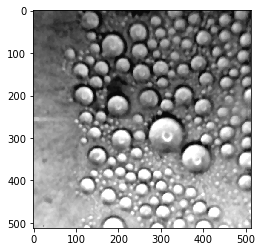

In [10]:
im_light = MakeWhite(im_in_actual, 2, 10) #alpha:1-3, beta:0 -100
plt.imshow(im_light)
plt.show()

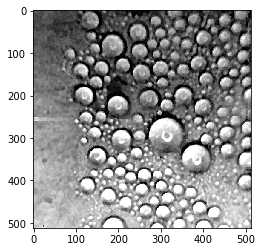

In [11]:

crop_sharp = unsharp_mask(im_light, kernel_size=(9, 9), sigma=2.0, amount=2.0, threshold=0)
crop_sharp_copy = crop_sharp
plt.imshow(crop_sharp)
plt.show()

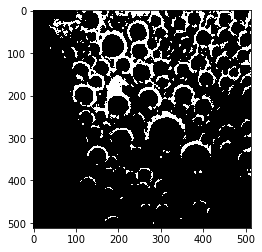

In [16]:
th, crop_sharp_th = cv.threshold(crop_sharp, 50, 255, cv.THRESH_BINARY_INV);
plt.imshow(crop_sharp_th)
plt.show()

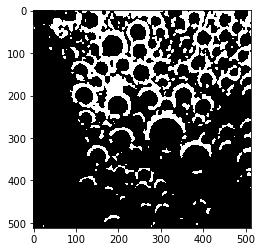

In [21]:
kernel = np.ones((3, 3), np.uint8)
dilation = cv.dilate(crop_sharp_th, kernel, iterations=2)
erosion = cv.erode(dilation , kernel, iterations=1)
plt.imshow(erosion )
plt.show()

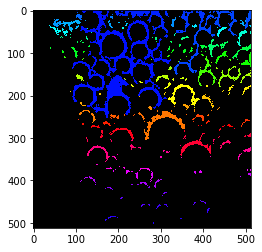

[[     0      0    512    512 230321]
 [    50      0      4      2      5]
 [    76      0      3      1      3]
 ...
 [   384    504      1      1      1]
 [    24    506      2      3      4]
 [   277    507      2      2      2]]


In [22]:
erosion = cv.cvtColor(crop_sharp_th, cv.COLOR_BGR2GRAY)
components, nlabels, labels, stats, centroids = CC(erosion)
plt.imshow(components)
plt.show()
print(stats.shape)